# Deep Learning Homework 01 PyTorch (part2)


### Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [60]:
import pandas as pd

data = pd.read_csv('diabetes.csv') # Import the data

data.head() # To see the first few columns 

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


### Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Add this import
from scipy import stats

In [62]:
print("This is to find the missing values")
print(data.isnull().sum())


This is to find the missing values
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64


In [63]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

Missing values in each column:
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64

Basic statistics of the dataset:
        -0.294118    0.487437    0.180328   -0.292929           0  0.00149028  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         -0.53117  -0.0333333         0.1  
coun

In [64]:
print("This is to find the missing values")
print(data.isnull().sum())

# Impute missing values (if any) with the median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


This is to find the missing values
-0.294118     0
0.487437      0
0.180328      0
-0.292929     0
0             0
0.00149028    0
-0.53117      0
-0.0333333    0
0.1           0
dtype: int64


In [65]:
print("The statistics after imputation")
print(data_imputed.describe())

# Find and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(data_imputed.iloc[:, :-1]))  # Exclude the label column for outlier detection
threshold = 3  # This is the threshold for outliers
outliers = np.where(z_scores > threshold)

# This is to remove outliers
data_cleaned = data_imputed[(z_scores < threshold).all(axis=1)]
print(f"\nData shape after outlier removal: {data_cleaned.shape}")

The statistics after imputation
        -0.294118    0.487437    0.180328   -0.292929           0  0.00149028  \
count  758.000000  758.000000  758.000000  758.000000  758.000000  758.000000   
mean    -0.407807    0.218208    0.176500   -0.289731   -0.323961   -0.032289   
std      0.386493    0.306465    0.201420    0.258651    0.375608    0.205508   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.179583   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         -0.53117  -0.0333333         0.1  
count  758.000000  758.000000  758.000000  
mean    -0.663427   -0.516799    0.654354  
std      0.283202    0.400674    0.475893  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241 

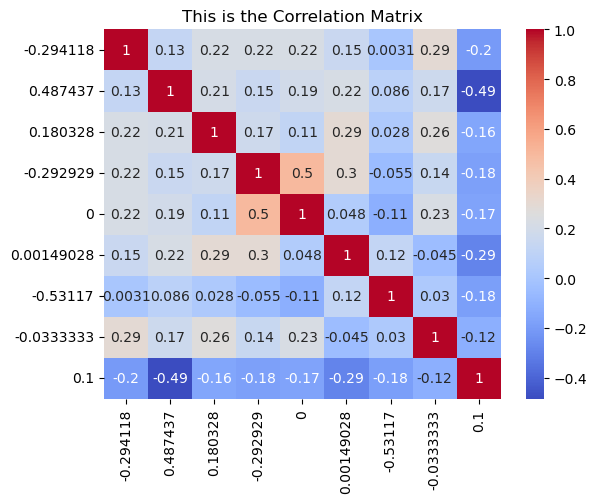

Training set shape: X_train: (584, 8), y_train: (584,)
Test set shape: X_test: (147, 8), y_test: (147,)


In [66]:
#Correlation matrix after preprocessing
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("This is the Correlation Matrix")
plt.show()


X = data_cleaned.iloc[:, :-1].values  # Features
y = data_cleaned.iloc[:, -1].values  # Labels

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

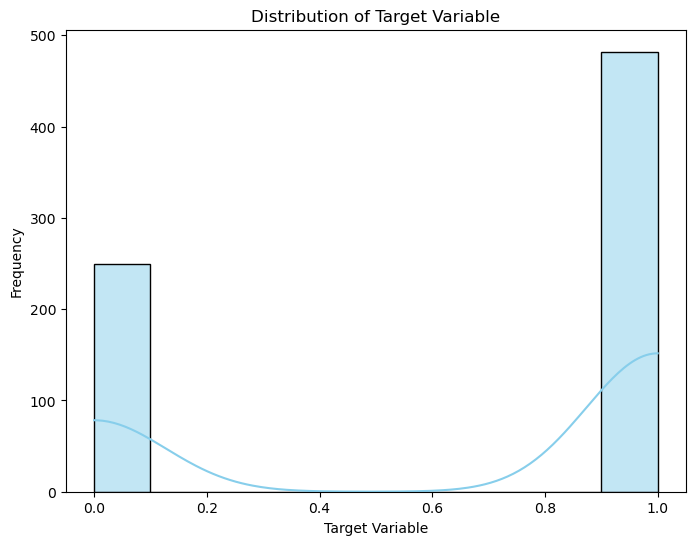

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color="skyblue", bins=10)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.show()


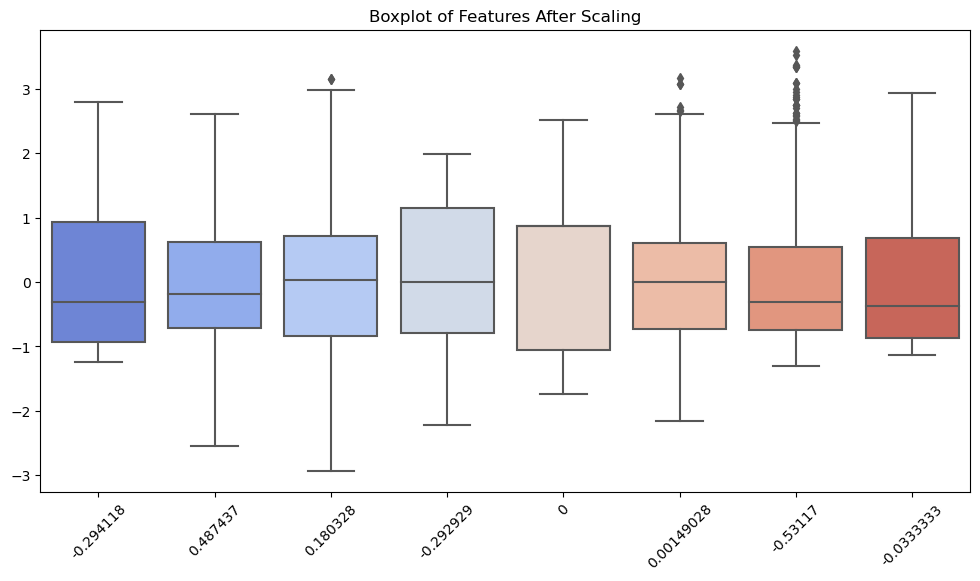

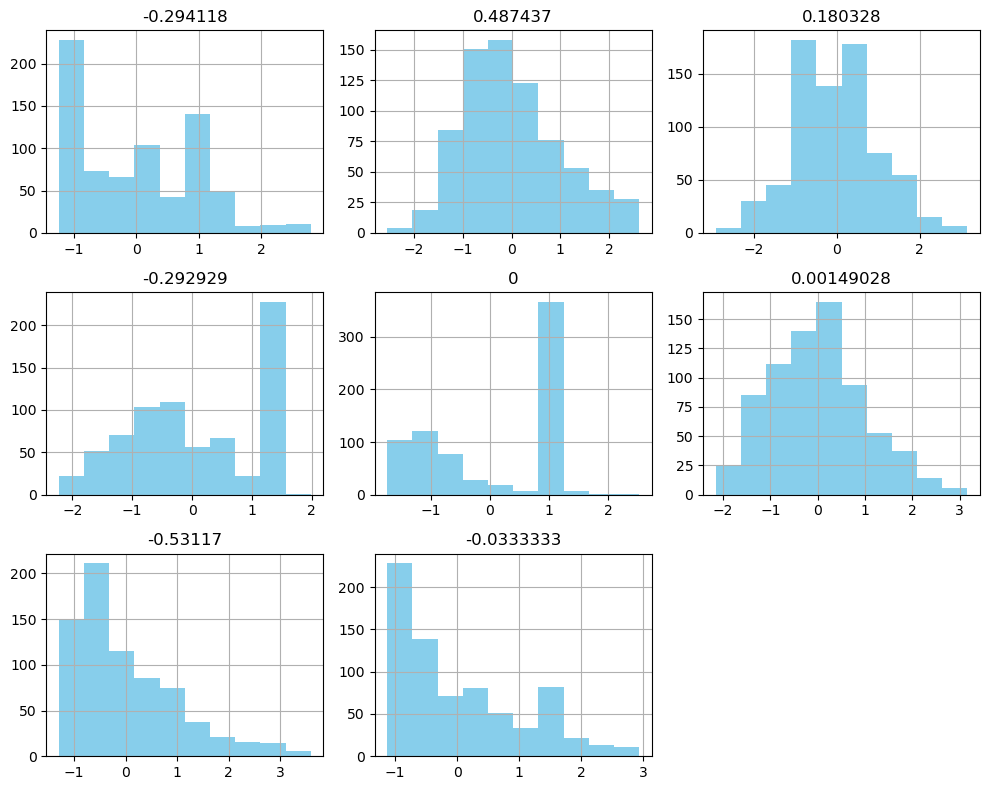

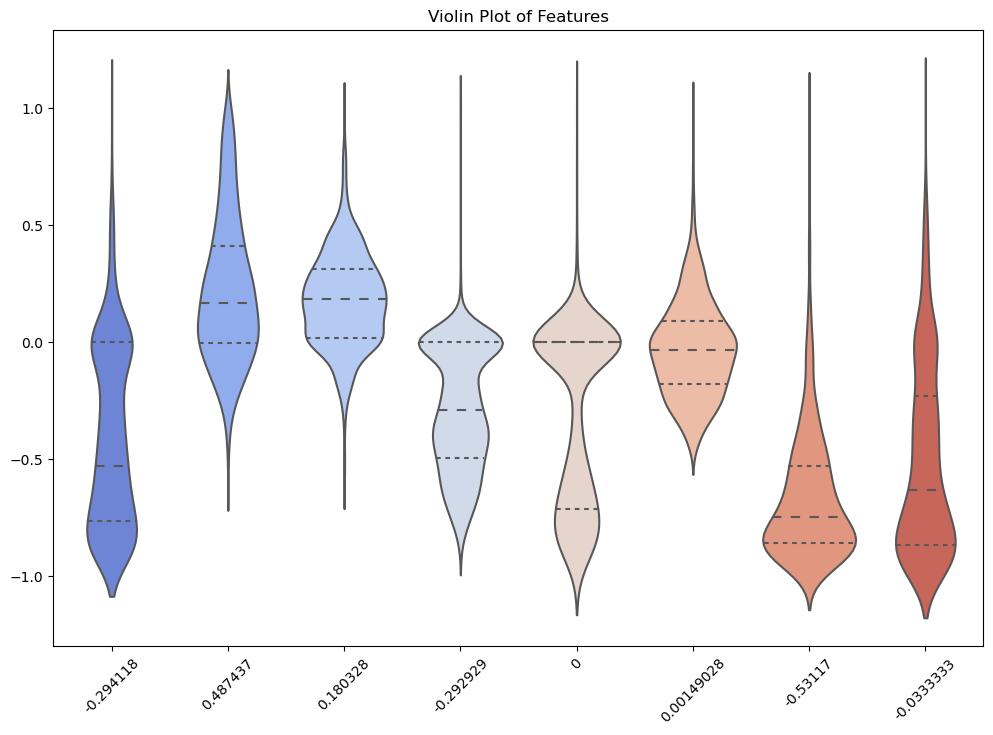

In [68]:
# Boxplot of features after scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=data_cleaned.columns[:-1]), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Boxplot of Features After Scaling")
plt.show()

# Histograms for each feature after preprocessing
pd.DataFrame(X_scaled, columns=data_cleaned.columns[:-1]).hist(figsize=(10, 8), bins=10, color='skyblue')
plt.tight_layout()
plt.show()

# Violin plot to show distribution and range of each feature
plt.figure(figsize=(12, 8))
sns.violinplot(data=data.iloc[:, :-1], palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of Features")
plt.show()

In [69]:

# Rename columns for clarity
columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Label']
data.columns = columns


from sklearn.preprocessing import StandardScaler

# Standardize the features (excluding the label column)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=columns[:-1])

# Adding the Label column back to the scaled dataset
data_scaled['Label'] = data['Label']

# Display the first few rows of the scaled data
data_scaled.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Label
0,-1.228637,-1.188317,-0.469641,-0.481314,0.863068,-0.851446,-0.365488,-0.374288,1
1,0.903546,2.027629,-0.632527,1.120903,0.863068,-1.330385,0.603099,-0.291038,0
2,-1.228637,-1.057054,-0.469641,-0.950259,-1.209017,-0.633749,-0.920691,1.290676,1
3,1.055845,0.518102,-2.587158,-0.012372,-0.742955,1.543241,5.479222,-0.207791,0
4,-0.010247,-0.171028,0.181905,1.120903,0.863068,-0.996582,-0.818100,-0.457535,1


### Step 3. Split into 70% train 30% test

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 4. Modify the model shown in the demo to take the new data

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(8, 16)  # Input layer with 8 features, 16 neurons
        self.layer2 = nn.Linear(16, 8)  # Hidden layer with 8 neurons
        self.output = nn.Linear(8, 1)   # Output layer for binary classification
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))  # ReLU activation for first layer
        x = torch.relu(self.layer2(x))  # ReLU activation for hidden layer
        x = torch.sigmoid(self.output(x))  # Sigmoid activation for binary classification
        return x

# Initialize the model
model = SimpleNN()


criterion = nn.BCELoss()  # Binary Cross Entropy Loss (same as binary_crossentropy in TensorFlow)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Display the model architecture
print(model)

SimpleNN(
  (layer1): Linear(in_features=8, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)


### Step 5. Train the model on the data

In [85]:
import torch
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer)

Epoch [1/50], Loss: 0.6564
Epoch [2/50], Loss: 0.6353
Epoch [3/50], Loss: 0.6290
Epoch [4/50], Loss: 0.6127
Epoch [5/50], Loss: 0.5934
Epoch [6/50], Loss: 0.5739
Epoch [7/50], Loss: 0.5357
Epoch [8/50], Loss: 0.5188
Epoch [9/50], Loss: 0.5131
Epoch [10/50], Loss: 0.4942
Epoch [11/50], Loss: 0.5367
Epoch [12/50], Loss: 0.4906
Epoch [13/50], Loss: 0.4850
Epoch [14/50], Loss: 0.4939
Epoch [15/50], Loss: 0.4790
Epoch [16/50], Loss: 0.4813
Epoch [17/50], Loss: 0.4804
Epoch [18/50], Loss: 0.4847
Epoch [19/50], Loss: 0.4775
Epoch [20/50], Loss: 0.4887
Epoch [21/50], Loss: 0.4737
Epoch [22/50], Loss: 0.4796
Epoch [23/50], Loss: 0.4701
Epoch [24/50], Loss: 0.4722
Epoch [25/50], Loss: 0.4753
Epoch [26/50], Loss: 0.4836
Epoch [27/50], Loss: 0.4731
Epoch [28/50], Loss: 0.4708
Epoch [29/50], Loss: 0.4734
Epoch [30/50], Loss: 0.4720
Epoch [31/50], Loss: 0.4696
Epoch [32/50], Loss: 0.4671
Epoch [33/50], Loss: 0.4694
Epoch [34/50], Loss: 0.4723
Epoch [35/50], Loss: 0.4833
Epoch [36/50], Loss: 0.4807
E

### Step 6. Make predictions on the test data and compare them to the test labels

In [87]:
import torch

# Convert the test data to a PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


model.eval()

# Make predictions
with torch.no_grad(): 
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float() 
# Display the first few predictions compared to actual labels
print("Predictions:", y_pred[:10].flatten().numpy())
print("Actual labels:", y_test[:10])

Predictions: [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
Actual labels: [0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


### Step 7. Calculate the accuracy of your results

In [93]:
from sklearn.metrics import accuracy_score
import torch

# Convert the test labels to a PyTorch tensor (no need to unsqueeze since y_test is a vector)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)



# Convert predictions to NumPy for accuracy calculation
y_pred_np = y_pred.numpy().flatten()  # Flattening to ensure 1D array for accuracy calculation
y_test_np = y_test_tensor.numpy()    

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred_np)
print(f"Accuracy on the test data: {accuracy:.2f}")

Accuracy on the test data: 0.78


### Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

 Hypothesis:

	•	Hypothesis 1: Double the no# of neurons in each hidden layer.
	•	Hypothesis 2: Add another hidden layer.

### Step 9. Test your hypothesis by training your new models

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model with more neurons
class ModelV2(nn.Module):
    def __init__(self):
        super(ModelV2, self).__init__()
        self.layer1 = nn.Linear(8, 32)  # 32 neurons instead of 16
        self.layer2 = nn.Linear(32, 16)  # 16 neurons instead of 8
        self.output = nn.Linear(16, 1)   # Output layer for binary classification
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.output(x))
        return x

# Initialize the model
model_v2 = ModelV2()

# Compile: Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss (same as binary_crossentropy)
optimizer = optim.Adam(model_v2.parameters(), lr=0.001)

# Convert training data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Create a DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Train the model
train_model(model_v2, train_loader, criterion, optimizer)


Epoch [1/50], Loss: 0.6722
Epoch [2/50], Loss: 0.6279
Epoch [3/50], Loss: 0.5865
Epoch [4/50], Loss: 0.5484
Epoch [5/50], Loss: 0.5095
Epoch [6/50], Loss: 0.5085
Epoch [7/50], Loss: 0.4957
Epoch [8/50], Loss: 0.5008
Epoch [9/50], Loss: 0.4796
Epoch [10/50], Loss: 0.4739
Epoch [11/50], Loss: 0.4774
Epoch [12/50], Loss: 0.4737
Epoch [13/50], Loss: 0.4844
Epoch [14/50], Loss: 0.4739
Epoch [15/50], Loss: 0.4678
Epoch [16/50], Loss: 0.4852
Epoch [17/50], Loss: 0.4741
Epoch [18/50], Loss: 0.4684
Epoch [19/50], Loss: 0.4680
Epoch [20/50], Loss: 0.4692
Epoch [21/50], Loss: 0.4717
Epoch [22/50], Loss: 0.4613
Epoch [23/50], Loss: 0.4643
Epoch [24/50], Loss: 0.4690
Epoch [25/50], Loss: 0.4565
Epoch [26/50], Loss: 0.4624
Epoch [27/50], Loss: 0.4833
Epoch [28/50], Loss: 0.4572
Epoch [29/50], Loss: 0.4533
Epoch [30/50], Loss: 0.4565
Epoch [31/50], Loss: 0.4538
Epoch [32/50], Loss: 0.4531
Epoch [33/50], Loss: 0.4515
Epoch [34/50], Loss: 0.4516
Epoch [35/50], Loss: 0.4709
Epoch [36/50], Loss: 0.4516
E

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model with an extra hidden layer
class ModelV3(nn.Module):
    def __init__(self):
        super(ModelV3, self).__init__()
        self.layer1 = nn.Linear(8, 16)  # Input layer with 16 neurons
        self.layer2 = nn.Linear(16, 16)  # New hidden layer with 16 neurons
        self.layer3 = nn.Linear(16, 8)  # Original hidden layer with 8 neurons
        self.output = nn.Linear(8, 1)   # Output layer for binary classification
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.output(x))
        return x

# Initialize the model
model_v3 = ModelV3()

# Compile: Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model_v3.parameters(), lr=0.001)

# Convert training data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Create a DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Train the model with an extra hidden layer
train_model(model_v3, train_loader, criterion, optimizer)


Epoch [1/50], Loss: 0.6598
Epoch [2/50], Loss: 0.6474
Epoch [3/50], Loss: 0.6240
Epoch [4/50], Loss: 0.5835
Epoch [5/50], Loss: 0.5273
Epoch [6/50], Loss: 0.5103
Epoch [7/50], Loss: 0.4993
Epoch [8/50], Loss: 0.4897
Epoch [9/50], Loss: 0.4893
Epoch [10/50], Loss: 0.4991
Epoch [11/50], Loss: 0.4804
Epoch [12/50], Loss: 0.4743
Epoch [13/50], Loss: 0.4867
Epoch [14/50], Loss: 0.4694
Epoch [15/50], Loss: 0.4761
Epoch [16/50], Loss: 0.4693
Epoch [17/50], Loss: 0.4726
Epoch [18/50], Loss: 0.4730
Epoch [19/50], Loss: 0.4854
Epoch [20/50], Loss: 0.4683
Epoch [21/50], Loss: 0.4700
Epoch [22/50], Loss: 0.4934
Epoch [23/50], Loss: 0.4701
Epoch [24/50], Loss: 0.4740
Epoch [25/50], Loss: 0.4657
Epoch [26/50], Loss: 0.4660
Epoch [27/50], Loss: 0.4662
Epoch [28/50], Loss: 0.4697
Epoch [29/50], Loss: 0.4606
Epoch [30/50], Loss: 0.4831
Epoch [31/50], Loss: 0.4578
Epoch [32/50], Loss: 0.4627
Epoch [33/50], Loss: 0.4536
Epoch [34/50], Loss: 0.4655
Epoch [35/50], Loss: 0.4656
Epoch [36/50], Loss: 0.4640
E

### Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.

In [91]:
import torch
from sklearn.metrics import accuracy_score

# Convert the test data to a PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Set the model to evaluation mode
model_v2.eval()
model_v3.eval()

# Make predictions for model_v2 (with more neurons)
with torch.no_grad():
    y_pred_v2 = model_v2(X_test_tensor)
    y_pred_v2 = (y_pred_v2 > 0.5).float()  # Apply threshold to convert to binary predictions (0 or 1)

# Convert y_pred_v2 to numpy for accuracy calculation
y_pred_v2 = y_pred_v2.numpy()
accuracy_v2 = accuracy_score(y_test, y_pred_v2)
print(f"Accuracy of the model with more neurons: {accuracy_v2:.2f}")

# Make predictions for model_v3 (with an extra hidden layer)
with torch.no_grad():
    y_pred_v3 = model_v3(X_test_tensor)
    y_pred_v3 = (y_pred_v3 > 0.5).float()  # Apply threshold to convert to binary predictions (0 or 1)

# Convert y_pred_v3 to numpy for accuracy calculation
y_pred_v3 = y_pred_v3.numpy()
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
print(f"Accuracy of the model with an extra hidden layer: {accuracy_v3:.2f}")

Accuracy of the model with more neurons: 0.82
Accuracy of the model with an extra hidden layer: 0.79


The accuracy was initally 78 , but when hypothesis are made changes , like adding more neurons and adding extra layers , the accuracy has increased to 82 and decreased to 79. This can be told by how the model learning capacity has increased. These hypothesis basically help in making the model to capture more complex patters in the data.  the original capicity might be enough More over the accuracy has decreased by adding extra hidden layer , which might be because of overfitting , the dataset might not have enough complexity and this could be the reason why.  